# FDIC: Failed Banks
* List of failed banks from 1/2000 to 5/2016
* https://www.fdic.gov/bank/individual/failed/

In [4]:
import pandas as pd
import numpy as np

from pivottablejs import pivot_ui

In [5]:
df = pd.read_csv('data/banklist.csv')

In [6]:
df['date'] = pd.to_datetime(df['ClosingDate'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [7]:
pivot_ui(df[['year','month','ST']])

In [8]:
import folium

In [9]:
state_geo = r'data/us-states.json'

In [10]:
df = pd.read_csv('data/totalBanks.csv')

In [11]:
map = folium.Map(location=[40, -100], zoom_start=4)
map.geo_json(geo_path=state_geo, data=df,
            columns=['state','total'],
            key_on='feature.id',
            threshold_scale=[0, 2, 10, 15, 25, 50],
            fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.4,
            legend_name='Failed Banks')
map

/Users/yunier/anaconda3/lib/python3.5/site-packages/folium/folium.py:504: UserWarning: This method is deprecated. Please use Map.choropleth instead.
  warnings.warn('This method is deprecated. '


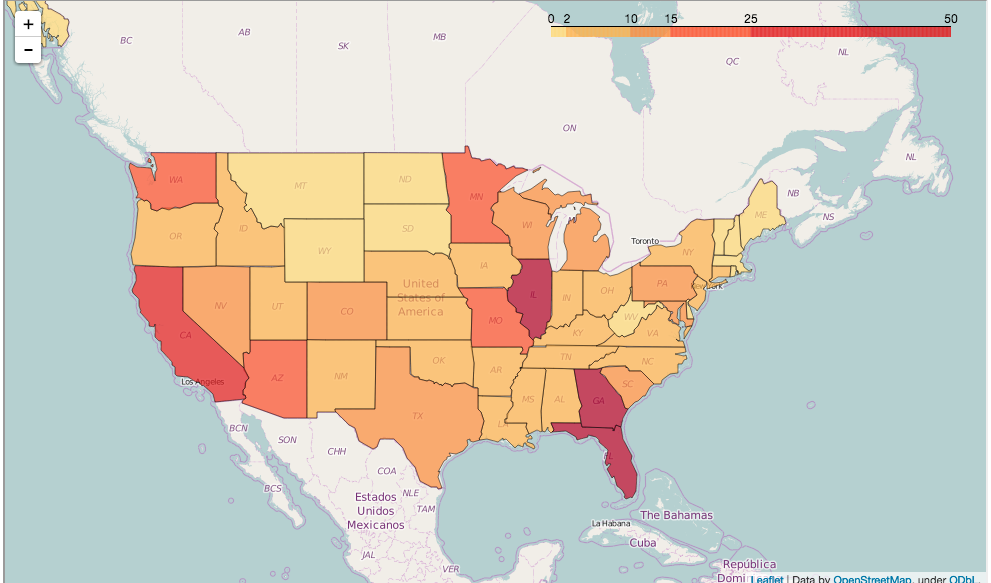

In [13]:
from IPython.core.display import Image
Image(filename=('/Users/yunier/credit_risk/us_failedbanks/img/fdic_failed_banks.png'))